## Importing Libraries:

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Load the Dataset:

In [39]:
# Load the cleaned Excel file
df = pd.read_csv(r"C:\Users\yashw\Downloads\Supermart_Grocery_Sales_Cleaned.csv")


In [41]:
# Inspect first few rows
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Year,Month Number,Profit Margin %,OrigType,ParsedDate,ParsedSuccess,Order Date Clean
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11 00:00:00,North,1254,0.12,401.28,Tamil Nadu,August,2017.0,8.0,32.0,datetime,2017-08-11,True,2017-08-11
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11 00:00:00,South,749,0.18,149.80,Tamil Nadu,August,2017.0,8.0,20.0,datetime,2017-08-11,True,2017-08-11
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06 00:00:00,West,2360,0.21,165.20,Tamil Nadu,December,2017.0,12.0,7.0,datetime,2017-12-06,True,2017-12-06
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10 00:00:00,South,896,0.25,89.60,Tamil Nadu,November,2016.0,11.0,10.0,datetime,2016-11-10,True,2016-11-10
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10 00:00:00,South,2355,0.26,918.45,Tamil Nadu,November,2016.0,11.0,39.0,datetime,2016-11-10,True,2016-11-10


In [43]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          9994 non-null   object 
 1   Customer Name     9994 non-null   object 
 2   Category          9994 non-null   object 
 3   Sub Category      9994 non-null   object 
 4   City              9994 non-null   object 
 5   Order Date        9994 non-null   object 
 6   Region            9994 non-null   object 
 7   Sales             9994 non-null   int64  
 8   Discount          9994 non-null   float64
 9   Profit            9994 non-null   float64
 10  State             9994 non-null   object 
 11  Month             9994 non-null   object 
 12  Year              4042 non-null   float64
 13  Month Number      4042 non-null   float64
 14  Profit Margin %   9994 non-null   float64
 15  OrigType          9994 non-null   object 
 16  ParsedDate        9994 non-null   object 


In [44]:
df.describe()


,Sales,Discount,Profit,Year,Month Number,Profit Margin %
count,9994.000000,9994.000000,9994.000000,4042.000000,4042.000000,9994.000000
mean,1496.596158,0.226817,374.937082,2016.723404,6.452499,18.784070
std,577.559036,0.074636,239.932881,1.119750,3.501948,623.800724
min,500.000000,0.100000,25.250000,2015.000000,1.000000,-62325.000000
25%,1000.000000,0.160000,180.022500,2016.000000,3.000000,15.000000
50%,1498.000000,0.230000,320.780000,2017.000000,6.000000,25.000000
75%,1994.750000,0.290000,525.627500,2018.000000,9.000000,35.000000
max,2500.000000,0.350000,1120.950000,2018.000000,12.000000,45.000000


In [10]:
df.isna().sum()

Order ID               0
Customer Name          0
Category               0
Sub Category           0
City                   0
Order Date             0
Region                 0
Sales                  0
Discount               0
Profit                 0
State                  0
Month                  0
Year                5952
Month Number        5952
Profit Margin %        0
OrigType               0
ParsedDate             0
ParsedSuccess          0
Order Date Clean       0
dtype: int64

## Clean & Standardize:

In [45]:
# Parse date column again (safety)
df['Order Date Clean'] = pd.to_datetime(df['Order Date Clean'], errors='coerce')


In [46]:
# Drop rows with missing key values
df.dropna(subset=['Order Date Clean', 'Sales', 'Profit'], inplace=True)


In [47]:
# Remove duplicates
df.drop_duplicates(inplace=True)


## Feature Engineering:

Adding Year, Month, Day, and Profit Margin.

In [15]:
df['Year'] = df['Order Date Clean'].dt.year
df['Month'] = df['Order Date Clean'].dt.month
df['MonthName'] = df['Order Date Clean'].dt.strftime('%B')
df['Day'] = df['Order Date Clean'].dt.day
df['ProfitMargin'] = (df['Profit'] / df['Sales']) * 100


In [16]:
df[['Order Date Clean','Year','MonthName','ProfitMargin']].head()


,Order Date Clean,Year,MonthName,ProfitMargin
0,2017-08-11,2017,August,32.0
1,2017-08-11,2017,August,20.0
2,2017-12-06,2017,December,7.0
3,2016-11-10,2016,November,10.0
4,2016-11-10,2016,November,39.0


## Exploratory Data Analysis (EDA):

Summary statistics

In [17]:
print("Total Sales:", df['Sales'].sum())
print("Total Profit:", df['Profit'].sum())
print("Average Discount:", df['Discount'].mean())


Total Sales: 14956982
Total Profit: 3747121.1999999997
Average Discount: 0.22681709025415253


Sales by Category

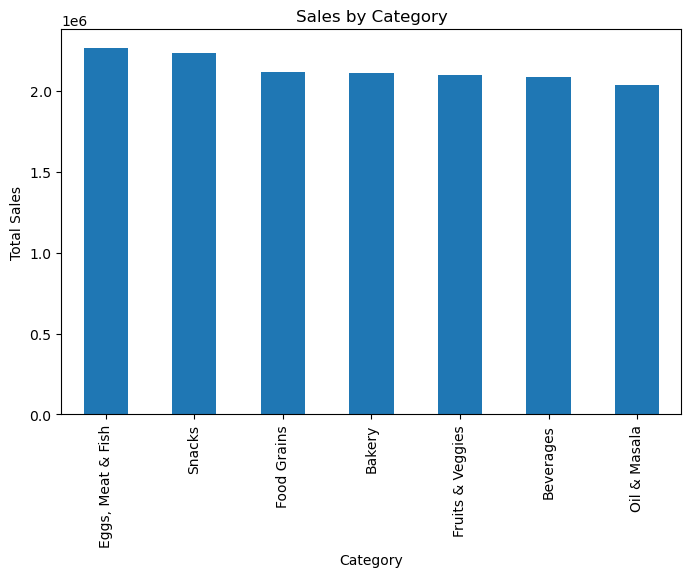

In [18]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(8,5), title='Sales by Category')
plt.ylabel('Total Sales')
plt.show()


Monthly Sales Trend

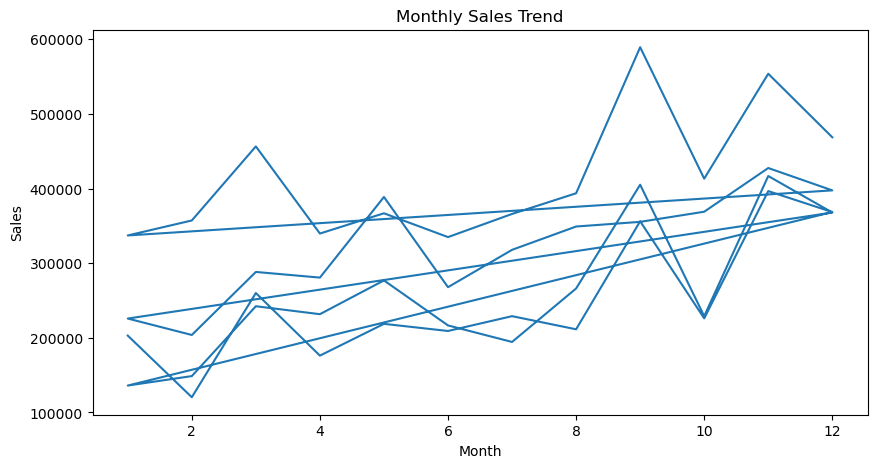

In [19]:
monthly_sales = df.groupby(['Year','Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


Top 10 Cities

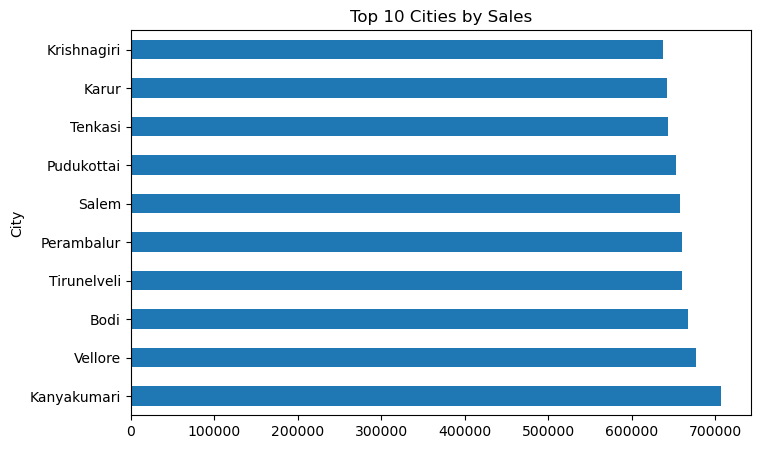

In [20]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='barh', figsize=(8,5), title='Top 10 Cities by Sales')
plt.show()


Profit vs Discount

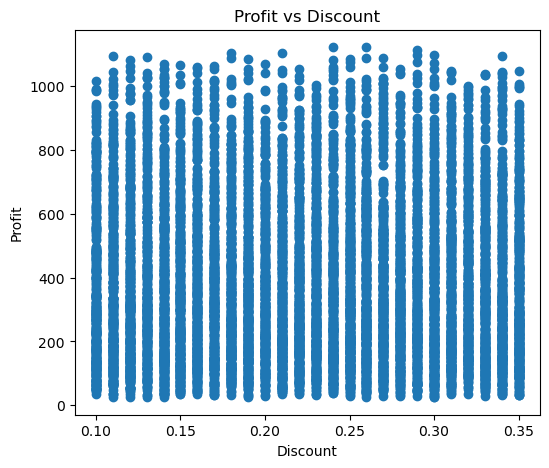

In [21]:
plt.figure(figsize=(6,5))
plt.scatter(df['Discount'], df['Profit'])
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


## Modeling (Predicting Sales):

Encode categorical variables

In [26]:
cat_cols = ['Category','Sub Category','Region','State']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))


Select features and target

In [32]:
X = df[['Discount','Profit','Year','Month','Category','Sub Category','Region','State']]
y = df['Sales']


Split data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Baseline Model — Linear Regression

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))


Linear Regression R²: 0.35483862410517997
Linear Regression RMSE: 461.28617551528026


Improved Model — Random Forest

In [35]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


Random Forest R²: 0.324410753110267
Random Forest RMSE: 472.03871968282687


Feature Importance

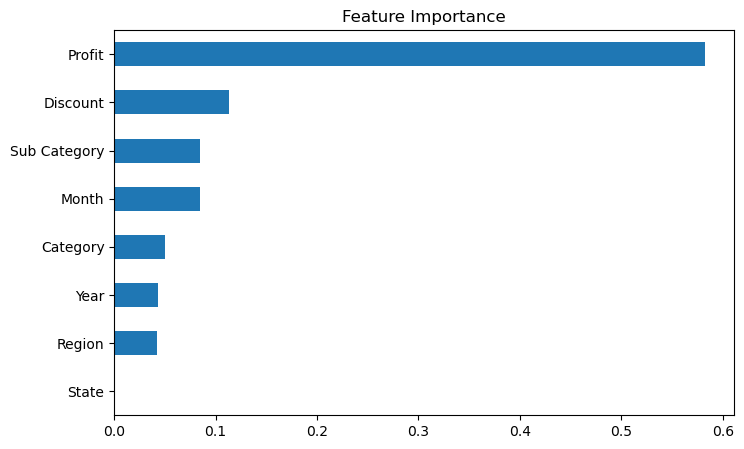

In [37]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,5), title='Feature Importance')
plt.show()
